### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
train_images = np.loadtxt('data_mnist/train_images.txt')
train_labels = np.loadtxt('data_mnist/train_labels.txt').astype(np.int64)

test_images = np.loadtxt('data_mnist/test_images.txt')
test_labels = np.loadtxt('data_mnist/test_labels.txt').astype(np.int64)

### Redimensioning the dataset to 28x28

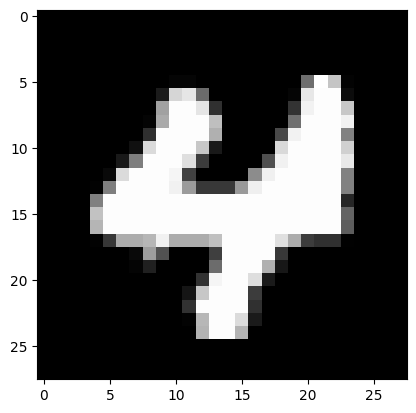

In [3]:
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [4]:
def values_to_bins(x, num_bins):
    return np.digitize(x, num_bins) - 1

def digitize_values(x, num_bins):
    bins = np.linspace(start=0, stop=255, num=num_bins)
    digitize_x = values_to_bins(x, bins)
    return digitize_x

train_images_bins = digitize_values(train_images, 5)
test_images_bins = digitize_values(test_images, 5)

### Import sklearn

In [5]:
from sklearn.naive_bayes import MultinomialNB

### Define and train the model

In [6]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images_bins, train_labels)

MultinomialNB()

### Model accuracy

In [7]:
naive_bayes_model.score(test_images_bins, test_labels)

0.836

In [8]:
max = float("-inf")
best_num_bins = 0
for num_bins in [3, 5, 7, 9, 11]:
  train_images_bins = digitize_values(train_images, num_bins)
  test_images_bins = digitize_values(test_images, num_bins)
  model = MultinomialNB()
  model.fit(train_images_bins, train_labels)
  accuracy = model.score(test_images_bins, test_labels)
  if accuracy > max:
      max = accuracy
      best_num_bins = num_bins
  print('num bins = %d has accuracy %f' % (num_bins, accuracy))

num bins = 3 has accuracy 0.826000
num bins = 5 has accuracy 0.836000
num bins = 7 has accuracy 0.842000
num bins = 9 has accuracy 0.842000
num bins = 11 has accuracy 0.842000


Predicted label:  8
Actual label:  5


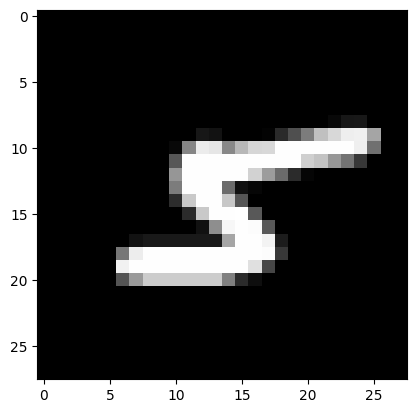

Predicted label:  0
Actual label:  6


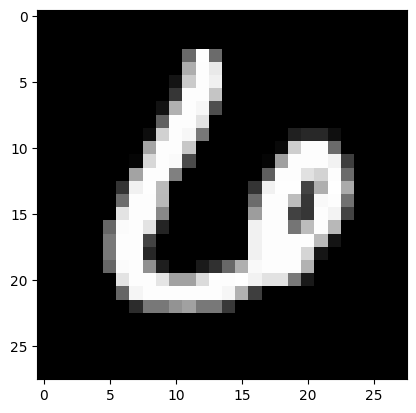

Predicted label:  9
Actual label:  4


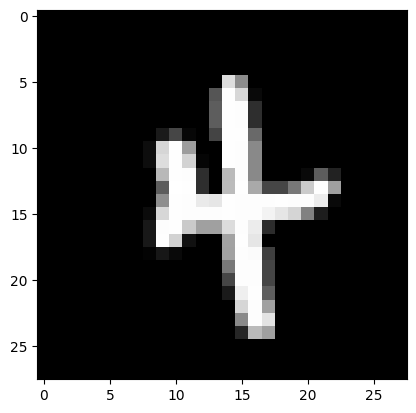

Predicted label:  9
Actual label:  7


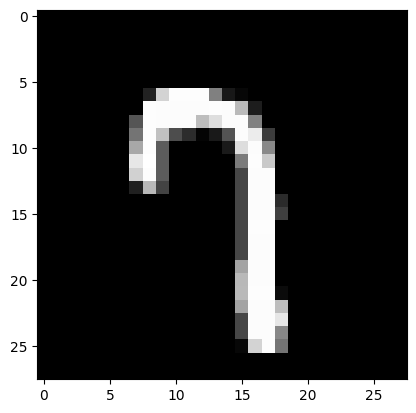

Predicted label:  3
Actual label:  2


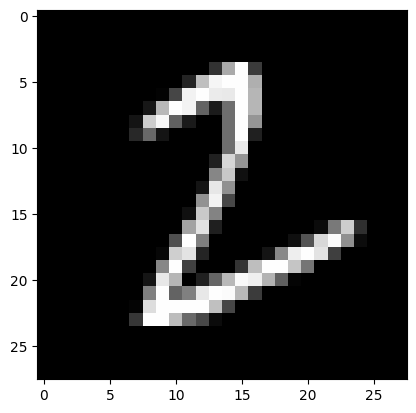

In [9]:
train_images_bins = digitize_values(train_images, best_num_bins)
test_images_bins = digitize_values(test_images, best_num_bins)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images_bins, train_labels)

predicted_labels = naive_bayes_model.predict(test_images_bins)
bad_predictions = np.where(predicted_labels != test_labels)[0]
for i in bad_predictions[:5]:
    image = test_images[i].reshape(28, 28)
    print('Predicted label: ', predicted_labels[i])
    print('Actual label: ', test_labels[i])
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()

### Confusion Matrix

In [10]:
def confusion_matrix(predicted_labels, actual_labels):
    confusion_matrix = np.zeros((10, 10))
    for i in range(len(predicted_labels)):
        confusion_matrix[actual_labels[i]][predicted_labels[i]] += 1
    return confusion_matrix

print(confusion_matrix(predicted_labels, test_labels))

[[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 48.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 2.  0. 51.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 34.  0.  0.  0.  2. 10.]
 [ 1.  0.  0.  9.  0. 35.  1.  0.  5.  1.]
 [ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
 [ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
 [ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
 [ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]]
